In [ ]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Data/Store-sales/train.csv')
holiday_events=pd.read_csv('/content/drive/MyDrive/Data/Store-sales/holidays_events.csv')
oil=pd.read_csv('/content/drive/MyDrive/Data/Store-sales/oil.csv')
stores=pd.read_csv('/content/drive/MyDrive/Data/Store-sales/stores.csv')
test=pd.read_csv('/content/drive/MyDrive/Data/Store-sales/test.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Data/Store-sales/transactions.csv')

In [ ]:
train.head(6)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0


In [ ]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
store_sales=train[['date','sales']]

In [ ]:
store_sales

,date,sales
0,2013-01-01,0.000
1,2013-01-01,0.000
2,2013-01-01,0.000
3,2013-01-01,0.000
4,2013-01-01,0.000
...,...,...
3000883,2017-08-15,438.133
3000884,2017-08-15,154.553
3000885,2017-08-15,2419.729
3000886,2017-08-15,121.000


In [ ]:
average_sales=store_sales.groupby('date').mean()['sales']

In [ ]:
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 1684, dtype: float64

In [ ]:
from pandas import DataFrame
average_sales_df=DataFrame(average_sales)

In [ ]:
average_sales_df

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [ ]:
import numpy as np
time=np.arange(len(average_sales_df.index))

In [ ]:
average_sales_df['time']=time

In [ ]:
average_sales_df['time']

date
2013-01-01       0
2013-01-02       1
2013-01-03       2
2013-01-04       3
2013-01-05       4
              ... 
2017-08-11    1679
2017-08-12    1680
2017-08-13    1681
2017-08-14    1682
2017-08-15    1683
Name: time, Length: 1684, dtype: int64

In [ ]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

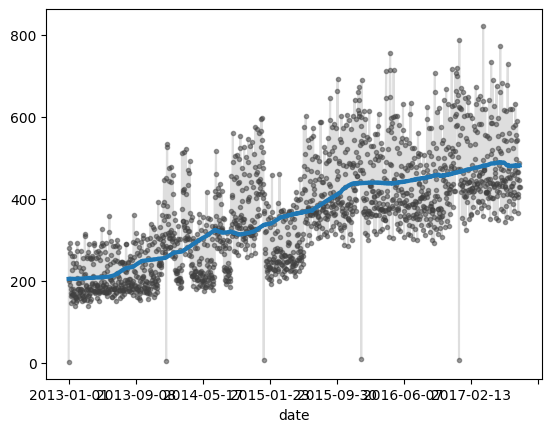

In [ ]:
trend = average_sales.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = average_sales.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [ ]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

Deterministic process will be used for time series forecasting and we will in sample out sample data it is train test split but it can overlap in this case

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess
y=average_sales.copy()
dp = DeterministicProcess(
        index=average_sales.index,
        constant=False,
        order=3,
        drop=True
)
X = dp.in_sample()

# Create features for a 90-day forecast.
X_fore = dp.out_of_sample(steps=90)
model = xg.XGBRegressor(n_estimators=35,max_depth=1)
model.fit(X, y)
reg = LinearRegression()
reg.fit(X, y)
y_pred1 = pd.Series(reg.predict(X), index=X.index)
y_fore1 = pd.Series(reg.predict(X_fore), index=X_fore.index)


y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

X_fore.tail()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,trend,trend_squared,trend_cubed
1770,1770.0,3132900.0,5.545233e+09
1771,1771.0,3136441.0,5.554637e+09
1772,1772.0,3139984.0,5.564052e+09
1773,1773.0,3143529.0,5.573477e+09
1774,1774.0,3147076.0,5.582913e+09


In [ ]:
y_pred-y_fore

2013-01-01   NaN
2013-01-02   NaN
2013-01-03   NaN
2013-01-04   NaN
2013-01-05   NaN
              ..
1770         NaN
1771         NaN
1772         NaN
1773         NaN
1774         NaN
Length: 1774, dtype: float32

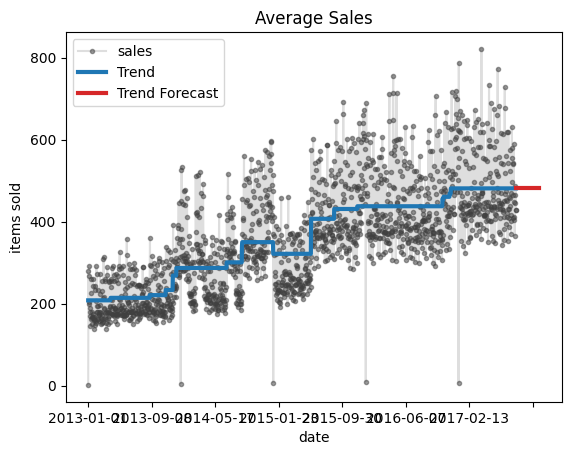

In [ ]:
ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

In [ ]:
holiday_events=pd.read_csv('/content/drive/MyDrive/Data/store-sales-time-series-forecasting (2)/holidays_events.csv')


In [ ]:
holiday_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
holiday_events.dtypes

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

WE WILL use parse to convert data string to data object and infer date time format

In [ ]:
train_new=train=pd.read_csv('/content/drive/MyDrive/Data/store-sales-time-series-forecasting (2)/train.csv'
,usecols=["store_nbr", "family", "date", "sales"],
        dtype={
            "store_nbr": "category",
            "family": "category",
            "sales": "float32",
        },
        parse_dates=['date'],
        infer_datetime_format=True,
)

In [ ]:
train_new.dtypes

date         datetime64[ns]
store_nbr          category
family             category
sales               float32
dtype: object

We wil convert the date to a period days using to_period('D') to_period is used to convert date into a specific time period  and it only shows a month not the day

In [ ]:
train_new['date']=train_new.date.dt.to_period('D')

In [ ]:
train_new['date']

0          2013-01-01
1          2013-01-01
2          2013-01-01
3          2013-01-01
4          2013-01-01
              ...    
3000883    2017-08-15
3000884    2017-08-15
3000885    2017-08-15
3000886    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: period[D]

In [ ]:
train_new.dtypes

date         period[D]
store_nbr     category
family        category
sales          float32
dtype: object

In [ ]:
train_new=train_new.set_index(['family','store_nbr','date']).sort_index()


In [ ]:
train_new_avg = (
   train_new.groupby('date').mean().squeeze().loc['2017']
)

In [ ]:
train_new_avg

date
2017-01-01      6.780303
2017-01-02    786.928406
2017-01-03    619.740234
2017-01-04    555.608032
2017-01-05    436.375397
                 ...    
2017-08-11    463.733856
2017-08-12    444.798279
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Freq: D, Name: sales, Length: 227, dtype: float32

In [ ]:
train_new

sales
family     store_nbr date                 
AUTOMOTIVE 1         2013-01-01   0.000000
                     2013-01-02   2.000000
                     2013-01-03   3.000000
                     2013-01-04   3.000000
                     2013-01-05   5.000000
...                                    ...
SEAFOOD    9         2017-08-11  23.830999
                     2017-08-12  16.859001
                     2017-08-13  20.000000
                     2017-08-14  17.000000
                     2017-08-15  16.000000

[3000888 rows x 1 columns]

To_frame used to convert it to dataframe

In [ ]:

X = train_new_avg.to_frame()

The .index.week helps us get the week of the sales

In [ ]:
X['week']=X.index.week

In [ ]:
X['day']=X.index.dayofweek

In [ ]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodgram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<ipython-input-39-c530c7e88b7a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


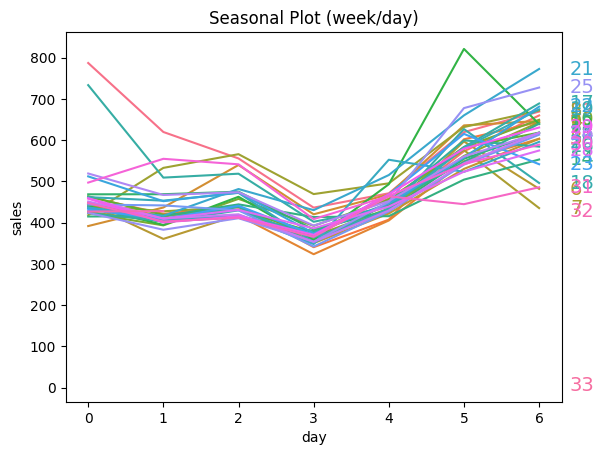

In [ ]:
seasonal_plot(X, y='sales', period='week', freq='day');

<ipython-input-41-d457b9506ec9>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodgram(train_new_avg)


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

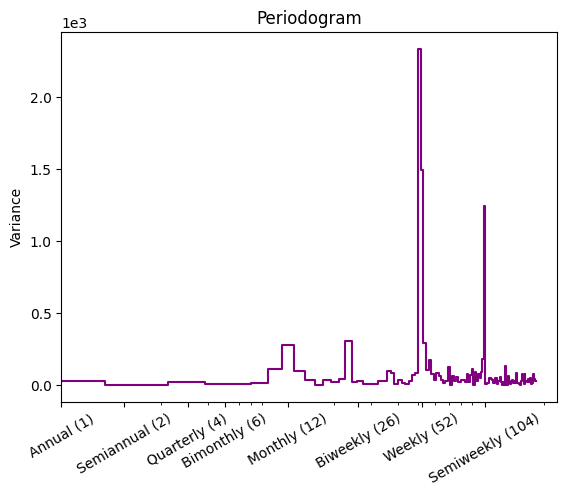

In [ ]:
plot_periodgram(train_new_avg)

In [ ]:
y=train_new_avg.copy()

In [ ]:
y.index

PeriodIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
             '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
             '2017-01-09', '2017-01-10',
             ...
             '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
             '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
             '2017-08-14', '2017-08-15'],
            dtype='period[D]', name='date', length=227)

Calendar Fourier is the fourier series which denotes the addition of the sin and cosine terms to the deterministic process which helps in getting the function better the order defines the number of seasonal components more the number of order  more the frequency will get it would give us information about the complex pattern but we would overfit the data
y=b0+b1t

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier
fourier = CalendarFourier(freq='M', order=4)

In [ ]:
fourier

Fourier(freq=M, order=4) at 0x7f24865c7e20

In [ ]:
dp1 = DeterministicProcess(
    index=y.index,#index y.index assumes index of only y
    constant=True,       # dummy feature for bias (y-intercept)
    order=1,             # trend (order 1 means linear)
    # YOUR CODE HERE
    seasonal=True,       # weekly seasonality (indicators)
    additional_terms=[fourier], # annual seasonality (fourier)
    drop=True,           # drop terms to avoid collinearity
)

In [ ]:
X = dp1.in_sample()

In [ ]:
X

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)"
date,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967
2017-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649
2017-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758
2017-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,1.0,223.0,0.0,0.0,0.0,0.0,1.0,0.0,0.897805,-0.440394,-0.790776,-0.612106,-0.201299,0.979530,0.968077,-0.250653
2017-08-12,1.0,224.0,0.0,0.0,0.0,0.0,0.0,1.0,0.790776,-0.612106,-0.968077,-0.250653,0.394356,0.918958,0.485302,-0.874347
2017-08-13,1.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651372,-0.758758,-0.988468,0.151428,0.848644,0.528964,-0.299363,-0.954139


Seasonal are the changes which are shown in each calendar year like whenever we have a dataset of about 10 years we can notice a pattern for each year and find the pattern

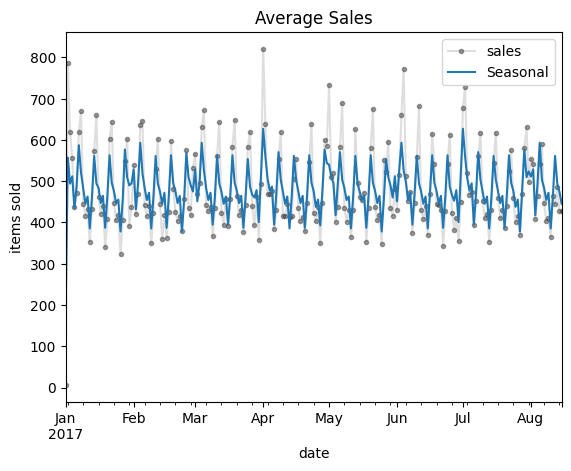

In [ ]:
model =xg.XGBRegressor(max_depth=1,n_estimators=35).fit(X, y)
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();


In [ ]:
X

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)"
date,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967
2017-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649
2017-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758
2017-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,1.0,223.0,0.0,0.0,0.0,0.0,1.0,0.0,0.897805,-0.440394,-0.790776,-0.612106,-0.201299,0.979530,0.968077,-0.250653
2017-08-12,1.0,224.0,0.0,0.0,0.0,0.0,0.0,1.0,0.790776,-0.612106,-0.968077,-0.250653,0.394356,0.918958,0.485302,-0.874347
2017-08-13,1.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651372,-0.758758,-0.988468,0.151428,0.848644,0.528964,-0.299363,-0.954139


For 90 days we will do a forecast

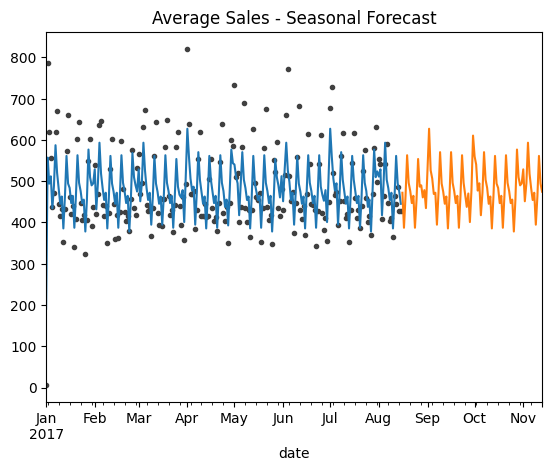

In [ ]:
model1=xg.XGBRegressor(max_depth=1,n_estimators=35).fit(X,y)
y_pred = pd.Series(model.predict(X), index=y.index)
X_fore1=dp1.out_of_sample(steps=90)
y_fore = pd.Series(model1.predict(X_fore1), index=X_fore1.index)
ax=y.plot(color='0.25', style='.', title="Average Sales - Seasonal Forecast")
ax=y_pred.plot(ax=ax,label='Seasonal')
ax=y_fore.plot(ax=ax,label='Seasonal_forecast')




In [ ]:
y_fore

2017-08-16    471.989960
2017-08-17    387.167511
2017-08-18    464.403290
2017-08-19    562.928711
2017-08-20    495.970337
                 ...    
2017-11-09    394.634247
2017-11-10    462.757111
2017-11-11    561.282471
2017-11-12    494.324158
2017-11-13    474.487366
Freq: D, Length: 90, dtype: float32

In [ ]:
y_deseason=y-y_pred

In [ ]:
y_deseason

date
2017-01-01   -184.068375
2017-01-02    229.777832
2017-01-03    125.661438
2017-01-04     43.900970
2017-01-05      2.024078
                 ...    
2017-08-11      0.976746
2017-08-12   -116.484192
2017-08-13     -8.555542
2017-08-14    -47.482635
2017-08-15    -17.267914
Freq: D, Length: 227, dtype: float32

<ipython-input-61-b9070df03297>:2: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax1 = plot_periodgram(y, ax=ax1)
<ipython-input-61-b9070df03297>:4: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  ax2 = plot_periodgram(y_deseason, ax=ax2);


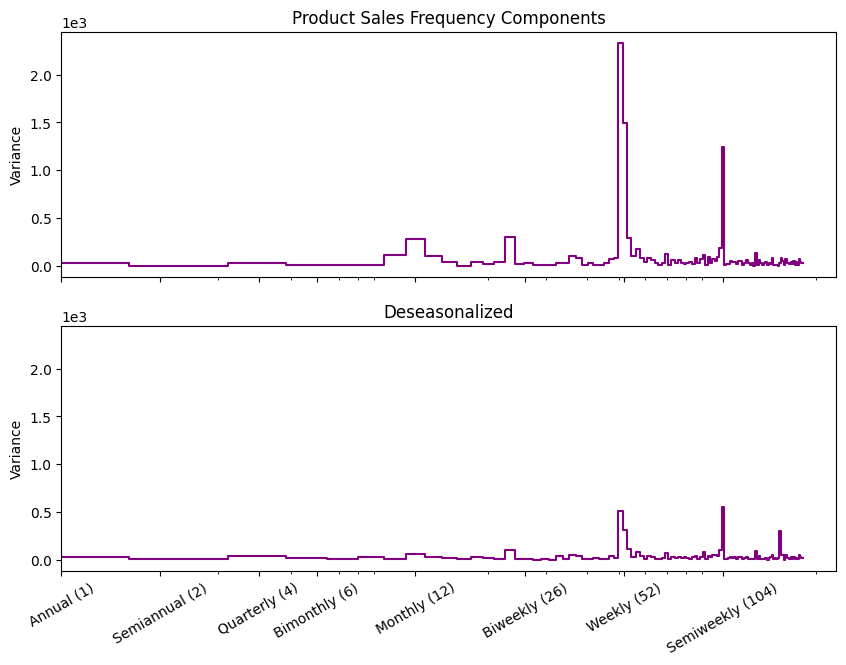

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))
ax1 = plot_periodgram(y, ax=ax1)
ax1.set_title("Product Sales Frequency Components")
ax2 = plot_periodgram(y_deseason, ax=ax2);
ax2.set_title("Deseasonalized");

In [ ]:
holiday_events['description']=holiday_events['description'].astype('category')

In [ ]:
holidays_df = pd.read_csv(('/content/drive/MyDrive/Data/store-sales-time-series-forecasting (2)/holidays_events.csv'),dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
holidays_events = holidays_df.copy()
holidays_events = holidays_events.set_index('date').to_period('D')

In [ ]:
holidays_events

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [ ]:
holidays = (
    holidays_events
    .query("locale in ['National', 'Regional']")
    .loc['2017':'2017-08-15', ['description']]
    .assign(description=lambda x: x.description.cat.remove_unused_categories())

)

In [ ]:
holidays

,description
date,
2017-01-01,Primer dia del ano
2017-01-02,Traslado Primer dia del ano
2017-02-27,Carnaval
2017-02-28,Carnaval
2017-04-01,Provincializacion de Cotopaxi
2017-04-14,Viernes Santo
2017-05-01,Dia del Trabajo
2017-05-13,Dia de la Madre-1
2017-05-14,Dia de la Madre


Red points in the dataframe shows thew holidays

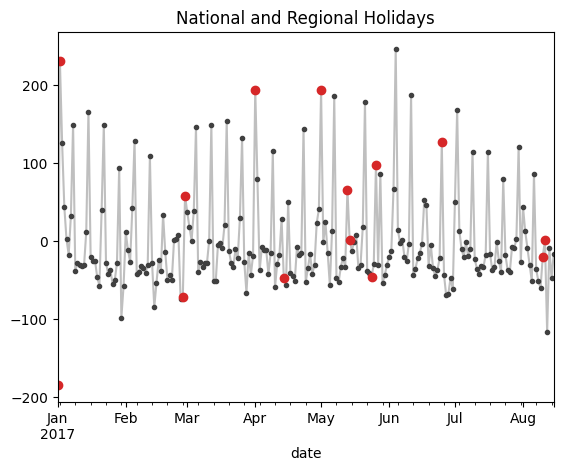

In [ ]:
ax = y_deseason.plot(**plot_params)
plt.plot_date(holidays.index, y_deseason[holidays.index], color='C3')
ax.set_title('National and Regional Holidays');

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

X_holidays = pd.DataFrame(
    ohe.fit_transform(holidays),
    index=holidays.index,
    columns=holidays.description.unique(),
)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_holidays

,Primer dia del ano,Traslado Primer dia del ano,Carnaval,Provincializacion de Cotopaxi,Viernes Santo,Dia del Trabajo,Dia de la Madre-1,Dia de la Madre,Batalla de Pichincha,Traslado Batalla de Pichincha,Provincializacion de Imbabura,Primer Grito de Independencia,Traslado Primer Grito de Independencia
date,,,,,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-02-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-04-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X2 = X.join(X_holidays, on='date').fillna(0.0)

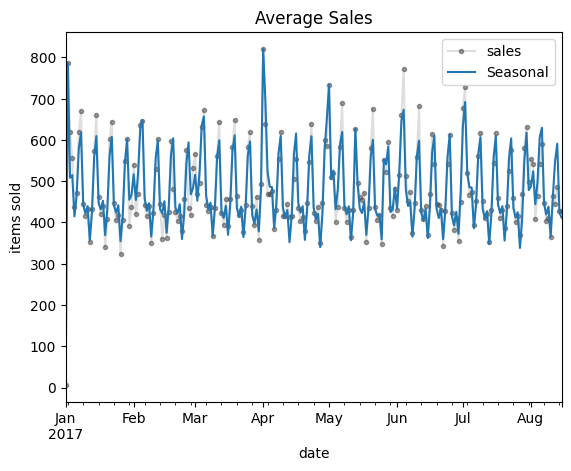

In [ ]:
model = LinearRegression().fit(X2, y)
y_pred = pd.Series(
    model.predict(X2),
    index=X2.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X2), index=X2.index)
ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();

In [ ]:
y = train_new.unstack(['store_nbr', 'family']).loc['2017']

In [ ]:
y

sales                                                         \
store_nbr           1         10         11         12         13         14   
family     AUTOMOTIVE AUTOMOTIVE AUTOMOTIVE AUTOMOTIVE AUTOMOTIVE AUTOMOTIVE   
date                                                                           
2017-01-01        0.0        0.0        0.0        0.0        0.0        0.0   
2017-01-02        5.0        4.0        9.0        6.0       13.0       13.0   
2017-01-03        4.0        3.0        7.0        3.0        7.0        6.0   
2017-01-04        1.0        6.0       10.0        4.0        5.0       10.0   
2017-01-05        2.0        2.0        6.0        1.0        8.0        8.0   
...               ...        ...        ...        ...        ...        ...   
2017-08-11        1.0        2.0       10.0        6.0        6.0        1.0   
2017-08-12        6.0        2.0       11.0        8.0        9.0       10.0   
2017-08-13        1.0        0.0        6.0       12.0        2.0        3.0   
2017-08-14        1.0        1.0        2.0        6.0        2.0        3.0   
2017-08-15        4.0        4.0        6.0        2.0        4.0        6.0   

                                                        ...          \
store_nbr          15         16         17         18  ...       5   
family     AUTOMOTIVE AUTOMOTIVE AUTOMOTIVE AUTOMOTIVE  ... SEAFOOD   
date                                                    ...           
2017-01-01        0.0        0.0        0.0        0.0  ...   0.000   
2017-01-02        5.0        3.0       16.0        5.0  ...  13.455   
2017-01-03        0.0        6.0        7.0        4.0  ...  15.150   
2017-01-04        2.0        4.0       14.0        4.0  ...  10.934   
2017-01-05        2.0        5.0        5.0        3.0  ...  10.000   
...               ...        ...        ...        ...  ...     ...   
2017-08-11        4.0        4.0        8.0        5.0  ...   8.402   
2017-08-12        7.0        5.0        4.0        6.0  ...   7.320   
2017-08-13        5.0        8.0        2.0        7.0  ...  11.642   
2017-08-14        6.0        5.0       14.0        2.0  ...  11.694   
2017-08-15        3.0        5.0        9.0        1.0  ...   9.669   

                                                                     \
store_nbr          50         51      52      53      54          6   
family        SEAFOOD    SEAFOOD SEAFOOD SEAFOOD SEAFOOD    SEAFOOD   
date                                                                  
2017-01-01   0.000000   0.000000   0.000     0.0     0.0   0.000000   
2017-01-02  47.143002  63.609001   0.000    16.0     8.0  75.906998   
2017-01-03  47.144001  56.898998   0.000     6.0     1.0  45.206001   
2017-01-04  19.889999  51.811001   0.000     8.0     2.0  47.521000   
2017-01-05  10.000000  35.362000   0.000     5.0     0.0  49.583000   
...               ...        ...     ...     ...     ...        ...   
2017-08-11  22.524000  74.933998  23.000     8.0     0.0  52.797001   
2017-08-12  15.801001  38.771999   5.000     6.0     1.0  35.029999   
2017-08-13  41.527000  39.965000  12.000     9.0     2.0  58.470001   
2017-08-14  12.242000  41.584000   6.595     9.0     0.0  37.879002   
2017-08-15  15.314000  52.875999   7.000     5.0     3.0  47.575001   

                                             
store_nbr           7          8          9  
family        SEAFOOD    SEAFOOD    SEAFOOD  
date                                         
2017-01-01   0.000000   0.000000   0.000000  
2017-01-02  68.089996  35.967999  23.000000  
2017-01-03  43.686001  46.526001  14.000000  
2017-01-04  70.833000  39.748001   0.000000  
2017-01-05  68.426003  46.819000  17.000000  
...               ...        ...        ...  
2017-08-11  40.477001  48.734001  23.830999  
2017-08-12  42.545002  25.243999  16.859001  
2017-08-13  33.647999  35.257999  20.000000  
2017-08-14  47.977001  33.252998  17.000000  
2017-08-15  46.507000  23.330000  16.00

In [ ]:
fourier = CalendarFourier(freq="M", order=4)

dp2 = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X = dp2.in_sample()

In [ ]:
X['NewYear'] = (X.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

In [ ]:
X['NewYear']

date
2017-01-01     True
2017-01-02    False
2017-01-03    False
2017-01-04    False
2017-01-05    False
              ...  
2017-08-11    False
2017-08-12    False
2017-08-13    False
2017-08-14    False
2017-08-15    False
Freq: D, Name: NewYear, Length: 227, dtype: bool

In [ ]:
y_pred

sales                                            \
store_nbr              1            10            11            12   
family        AUTOMOTIVE    AUTOMOTIVE    AUTOMOTIVE    AUTOMOTIVE   
date                                                                 
2017-01-01  3.197442e-14  3.730349e-14 -3.197442e-14 -3.552714e-15   
2017-01-02  4.158065e+00  4.044345e+00  1.012048e+01  8.663342e+00   
2017-01-03  4.019103e+00  4.135764e+00  1.060484e+01  7.181115e+00   
2017-01-04  4.086815e+00  3.609144e+00  9.814618e+00  7.539548e+00   
2017-01-05  3.927327e+00  3.301002e+00  9.939010e+00  6.883730e+00   
...                  ...           ...           ...           ...   
2017-08-11  6.230058e+00  1.171284e+00  6.346177e+00  4.793155e+00   
2017-08-12  5.340005e+00  2.430298e+00  8.355351e+00  9.032936e+00   
2017-08-13  2.504829e+00  2.143132e+00  9.622841e+00  7.388998e+00   
2017-08-14  4.341639e+00  9.179603e-01  6.110920e+00  4.965914e+00   
2017-08-15  4.103242e+00  1.269454e+00  6.036939e+00  3.156290e+00   

                                                                    \
store_nbr             13            14            15            16   
family        AUTOMOTIVE    AUTOMOTIVE    AUTOMOTIVE    AUTOMOTIVE   
date                                                                 
2017-01-01  4.618528e-14  3.907985e-14  4.085621e-14  3.641532e-14   
2017-01-02  9.260778e+00  7.578181e+00  4.096467e+00  5.861912e+00   
2017-01-03  8.059835e+00  6.772192e+00  3.912496e+00  5.874824e+00   
2017-01-04  8.135894e+00  6.372413e+00  3.365937e+00  5.015234e+00   
2017-01-05  8.497599e+00  5.576807e+00  2.547359e+00  4.390649e+00   
...                  ...           ...           ...           ...   
2017-08-11  2.924808e+00  2.495021e+00  3.284989e+00  4.060586e+00   
2017-08-12  5.510727e+00  5.613291e+00  5.521486e+00  6.281833e+00   
2017-08-13  3.766883e+00  3.826818e+00  4.650173e+00  6.695993e+00   
2017-08-14  3.113487e+00  2.741999e+00  4.119523e+00  4.666676e+00   
2017-08-15  2.074695e+00  2.022021e+00  3.577131e+00  4.450430e+00   

                                        ...                              \
store_nbr             17            18  ...             5            50   
family        AUTOMOTIVE    AUTOMOTIVE  ...       SEAFOOD       SEAFOOD   
date                                    ...                               
2017-01-01 -1.776357e-15  3.907985e-14  ...  7.105427e-14  2.131628e-13   
2017-01-02  1.104775e+01  4.432336e+00  ...  1.079380e+01  2.332405e+01   
2017-01-03  1.054604e+01  4.571516e+00  ...  1.110764e+01  2.086112e+01   
2017-01-04  1.095539e+01  4.714670e+00  ...  1.126780e+01  1.944714e+01   
2017-01-05  1.032535e+01  4.064317e+00  ...  1.527877e+01  1.547118e+01   
...                  ...           ...  ...           ...           ...   
2017-08-11  3.704846e+00  4.200421e+00  ...  1.270568e+01  2.672480e+01   
2017-08-12  1.287153e+01  6.878927e+00  ...  1.063120e+01  2.632780e+01   
2017-08-13  1.182665e+01  6.784697e+00  ...  1.151486e+01  2.678308e+01   
2017-08-14  7.694124e+00  3.230191e+00  ...  9.823896e+00  1.846920e+01   
2017-08-15  7.319865e+00  3.049193e+00  ...  9.758174e+00  1.556663e+01   

                                                                    \
store_nbr             51            52            53            54   
family           SEAFOOD       SEAFOOD       SEAFOOD       SEAFOOD   
date                                                                 
2017-01-01  3.552714e-13  1.965095e-14  1.598721e-14  2.842171e-14   
2017-01-02  5.743309e+01 -2.459172e+00  7.318001e+00  1.974891e+00   
2017-01-03  4.581580e+01 -1.854796e+00  6.178814e+00  1.718191e+00   
2017-01-04  5.201296e+01 -3.951634e+00  6.455696e+00  2.111297e+00   
2017-01-05  3.465272e+01 -3.342365e+00  5.729709e+00  9.941833e-01   
...                  ...           ...           ...           ...   
2017-08-11  7.544711e+01  1.202075e+01  6.660543e+00  1.504976e+00   
2017-08-12  4.997989e

In [ ]:
STORE_NBR = '1'  # 1 - 54
FAMILY = 'PRODUCE'

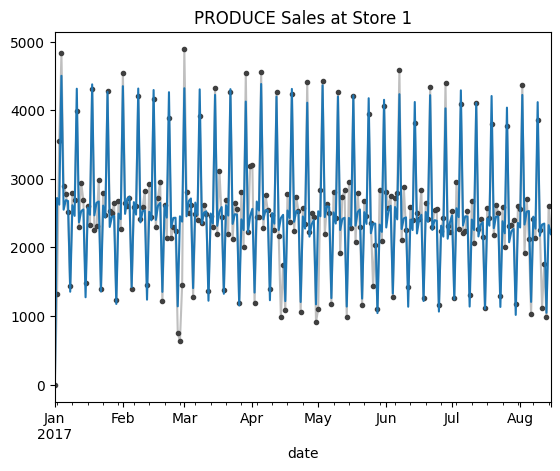

In [ ]:
ax = y.loc(axis=1)['sales', STORE_NBR, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', STORE_NBR, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} Sales at Store {STORE_NBR}');

In [ ]:
df_test = pd.read_csv(
   ('/content/drive/MyDrive/Data/store-sales-time-series-forecasting (2)/test.csv')
    ,dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)

In [ ]:
df_test['date']=df_test.date.dt.to_period('D')

In [ ]:
df_test = df_test.set_index(['store_nbr', 'family', 'date']).sort_index()

In [ ]:
df_test

id  onpromotion
store_nbr family     date                            
1         AUTOMOTIVE 2017-08-16  3000888            0
                     2017-08-17  3002670            0
                     2017-08-18  3004452            0
                     2017-08-19  3006234            0
                     2017-08-20  3008016            0
...                                  ...          ...
9         SEAFOOD    2017-08-27  3022271            0
                     2017-08-28  3024053            0
                     2017-08-29  3025835            0
                     2017-08-30  3027617            0
                     2017-08-31  3029399            0

[28512 rows x 2 columns]

In [ ]:
X_test = dp2.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)

In [ ]:
X_test

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)",NewYear
date,,,,,,,,,,,,,,,,,
2017-08-16,1.0,228.0,0.0,0.0,1.0,0.0,0.0,0.0,0.101168,-0.994869,-0.201299,0.979530,0.299363,-0.954139,-0.394356,0.918958,False
2017-08-17,1.0,229.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.101168,-0.994869,0.201299,0.979530,-0.299363,-0.954139,0.394356,0.918958,False
2017-08-18,1.0,230.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.299363,-0.954139,0.571268,0.820763,-0.790776,-0.612106,0.937752,0.347305,False
2017-08-19,1.0,231.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.485302,-0.874347,0.848644,0.528964,-0.998717,-0.050649,0.897805,-0.440394,False
2017-08-20,1.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.651372,-0.758758,0.988468,0.151428,-0.848644,0.528964,0.299363,-0.954139,False
2017-08-21,1.0,233.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.790776,-0.612106,0.968077,-0.250653,-0.394356,0.918958,-0.485302,-0.874347,False
2017-08-22,1.0,234.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.897805,-0.440394,0.790776,-0.612106,0.201299,0.979530,-0.968077,-0.250653,False
2017-08-23,1.0,235.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.968077,-0.250653,0.485302,-0.874347,0.724793,0.688967,-0.848644,0.528964,False
2017-08-24,1.0,236.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.998717,-0.050649,0.101168,-0.994869,0.988468,0.151428,-0.201299,0.979530,False


In [ ]:
y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(['store_nbr', 'family'])
y_submit = y_submit.join(df_test.id).reindex(columns=['id', 'sales'])


In [ ]:
y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(['store_nbr', 'family'])
y_submit = y_submit.join(df_test.id).reindex(columns=['id', 'sales'])


id        sales
date       store_nbr family                                          
2017-08-16 1         AUTOMOTIVE                  3000888     4.274030
                     BABY CARE                   3000889     0.000000
                     BEAUTY                      3000890     3.495530
                     BEVERAGES                   3000891  2414.541711
                     BOOKS                       3000892     0.438314
...                                                  ...          ...
2017-08-31 9         POULTRY                     3029395   372.417153
                     PREPARED FOODS              3029396   107.843530
                     PRODUCE                     3029397  1273.316507
                     SCHOOL AND OFFICE SUPPLIES  3029398    44.945937
                     SEAFOOD                     3029399    18.946715

[28512 rows x 2 columns]

In [ ]:
from google.colab import files
y_submit.to_csv('submission.csv', encoding = 'utf-8-sig')
files.download('submission.csv')